In [16]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
file_path_ca = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//3. Case studies (Four)//Case Study 2 - Credit Card Case Study//"
file_name_ca = "Customer_Acqusition.csv"

file_path_re = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//3. Case studies (Four)//Case Study 2 - Credit Card Case Study//"
file_name_re = "Repayment.csv"

file_path_sp = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//3. Case studies (Four)//Case Study 2 - Credit Card Case Study//"
file_name_sp = "spend.csv"

file_path_ca + file_name_ca
file_path_re + file_name_re
file_path_sp + file_name_sp

'C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//3. Case studies (Four)//Case Study 2 - Credit Card Case Study//spend.csv'

In [18]:
cust_main = pd.read_csv(file_path_ca + file_name_ca)
repy_main = pd.read_csv(file_path_re + file_name_re)
spend_main = pd.read_csv(file_path_sp + file_name_sp)

In [19]:
cust = cust_main.copy()
repy = repy_main.copy()
spend = spend_main.copy()

In [20]:
cust.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [21]:
repy.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [22]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [23]:
# dropping the extra columns(no., sl no., unnamed:4) from the dataframes 

In [24]:
cust.drop(columns=['No'],inplace=True)

In [25]:
repy.drop(columns=['SL No:','Unnamed: 4'],inplace=True)

In [26]:
spend.drop(columns=['Sl No:'],inplace=True)

In [27]:
# converting month column name to date and amount column to repayment_amt and spend_amt

In [28]:
repy.rename(columns={'Month':'repayment_date', 'Amount':'repayment_amt'},inplace=True)

In [29]:
spend.rename(columns={'Month':'spend_date', 'Amount':'spend_amt'},inplace=True)

In [30]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


In [31]:
repy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer        1500 non-null   object 
 1   repayment_date  1500 non-null   object 
 2   repayment_amt   1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 35.8+ KB


In [32]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Customer    1500 non-null   object 
 1   spend_date  1500 non-null   object 
 2   Type        1500 non-null   object 
 3   spend_amt   1500 non-null   float64
dtypes: float64(1), object(3)
memory usage: 47.0+ KB


In [33]:
# converting repayment_date and spend_date to proper datatime datatype
repy['repayment_date'] = pd.to_datetime(repy['repayment_date'])
spend['spend_date'] = pd.to_datetime(spend['spend_date'])

In [34]:
# check nulls and duplicates
cust.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [35]:
repy.isnull().sum()

Customer          23
repayment_date    23
repayment_amt     23
dtype: int64

In [36]:
repy.dropna(inplace=True)

In [37]:
spend.isnull().sum()

Customer      0
spend_date    0
Type          0
spend_amt     0
dtype: int64

In [38]:
cust.duplicated().sum()

0

In [39]:
repy.duplicated().sum()

0

In [40]:
spend.duplicated().sum()

0

In [41]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


In [42]:
repy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Customer        1500 non-null   object        
 1   repayment_date  1500 non-null   datetime64[ns]
 2   repayment_amt   1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 46.9+ KB


In [43]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Customer    1500 non-null   object        
 1   spend_date  1500 non-null   datetime64[ns]
 2   Type        1500 non-null   object        
 3   spend_amt   1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 47.0+ KB


In [44]:
cust['Age'] = cust[['Age']].applymap(lambda x: x if x>18 else cust['Age'].mean())

In [45]:
# for (b) and (c) part of the question we will go with .merge method on two tables at a time
# i tried connecting all 3 tables but it will bring too many rows and data analysis will not work for that.
# so we will go with two tables combination 
# 1. Customer acquisition + spend
# 2. customer acquisition + repayment

In [46]:
cust_s = pd.merge(left=spend, right=cust, left_on='Customer', right_on='Customer', how='left')
cust_r = pd.merge(left=repy, right=cust, left_on='Customer', right_on='Customer', how='left')

In [47]:
cust_s.head(2)

,Customer,spend_date,Type,spend_amt,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,JEWELLERY,485470.80,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,2004-01-03,PETRO,410556.13,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [48]:
cust_r.head(2)

,Customer,repayment_date,repayment_amt,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,2004-01-03,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [49]:
cust_s.isnull().sum()

Customer      0
spend_date    0
Type          0
spend_amt     0
Age           0
City          0
Product       0
Limit         0
Company       0
Segment       0
dtype: int64

In [50]:
cust_r.isnull().sum()

Customer          0
repayment_date    0
repayment_amt     0
Age               0
City              0
Product           0
Limit             0
Company           0
Segment           0
dtype: int64

In [51]:
cust_s.duplicated().sum()

0

In [52]:
cust_r.duplicated().sum()

0

In [53]:
cust_s.loc[(cust_s['spend_amt'] > cust_s['Limit']), ['spend_amt']] = cust_s['Limit'] * 0.5

In [54]:
cust_r.loc[(cust_r['repayment_amt'] > cust_r['Limit']), ['repayment_amt']] = cust_r['Limit']

In [55]:
2. From the above dataset create the following summaries:
a. How many distinct customers exist?
b. How many distinct categories exist?
c. What is the average monthly spend by customers?
d. What is the average monthly repayment by customers?
e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)
f. What are the top 5 product types?
g. Which city is having maximum spend?
h. Which age group is spending more money? 
i. Who are the top 10 customers in terms of repayment?

SyntaxError: invalid character '–' (U+2013) (1926067679.py, line 8)

In [ ]:
cust['Customer'].unique().size

In [ ]:
cust['Segment'].unique().size

In [ ]:
spend_monthwise = spend.groupby(by=[spend['spend_date'].dt.year, spend['spend_date'].dt.month]).agg({'spend_amt':np.sum})
spend_monthwise['spend_amt'].mean()

In [ ]:
repy_monthwise = repy.groupby(by=[repy['repayment_date'].dt.year, repy['repayment_date'].dt.month]).agg({'repayment_amt':np.sum})
repy_monthwise['repayment_amt'].mean()

In [ ]:
monthwise_sp_re = pd.concat([spend_monthwise, repy_monthwise], axis=1)

In [ ]:
monthwise_sp_re['monthly_profit'] = monthwise_sp_re['repayment_amt'] - monthwise_sp_re['spend_amt']

In [ ]:
monthwise_sp_re

In [ ]:
monthwise_sp_re[['monthly_profit']].applymap(lambda x: x*.029 if x>0 else np.nan)

In [ ]:
 spend.head()

In [ ]:
spend.groupby('Type').agg({'spend_amt':np.sum}).sort_values(by='spend_amt',ascending=False).head(5)

In [ ]:
cust_s.groupby('City').agg({'spend_amt':np.sum}).sort_values(by='spend_amt', ascending=False).head(1)

In [ ]:
cust_r.head()

In [ ]:
cust_r.groupby('Customer').agg({'repayment_amt':np.sum}).sort_values(by='repayment_amt', ascending=False).head(10)

In [ ]:
3. Calculate the city wise spend on each product on yearly basis. Also include a graphical
representation for the same.

In [57]:
cust_s['year'] = cust_s['spend_date'].dt.year
cust_s['month'] = cust_s['spend_date'].dt.month

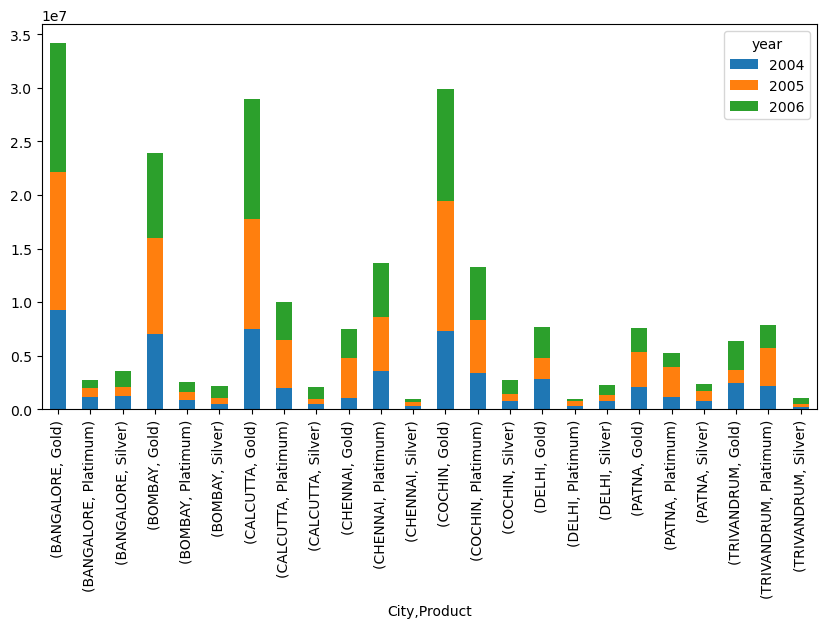

In [58]:
table3 = pd.pivot_table(cust_s, values='spend_amt', index=['City','Product'],  columns =['year'], aggfunc=np.sum)
table3.plot(kind='bar',figsize=(10,5),stacked=True)
plt.show()

In [ ]:
4. Create graphs for
a. Monthly comparison of total spends, city wise
b. Comparison of yearly spend on air tickets
c. Comparison of monthly spend for each product (look for any seasonality
that exists in terms of spend)

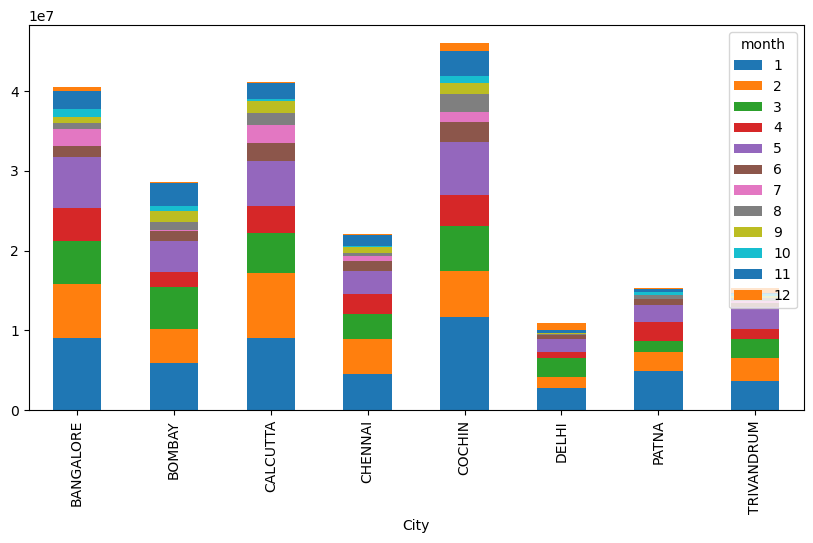

In [59]:
pd.pivot_table(cust_s, values='spend_amt', index=['City'],  columns =['month'], aggfunc=np.sum).plot(kind='bar',figsize=(10,5),stacked=True)
plt.show()

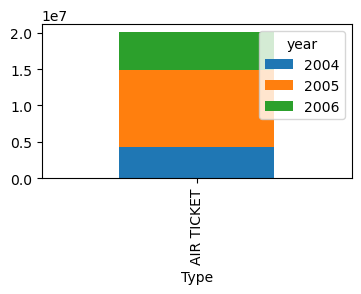

In [60]:
pd.pivot_table(cust_s, values='spend_amt', index=['Type'],  columns =['year'], aggfunc=np.sum).head(1).plot(kind='bar',figsize=(4,2),stacked=True)
plt.show()

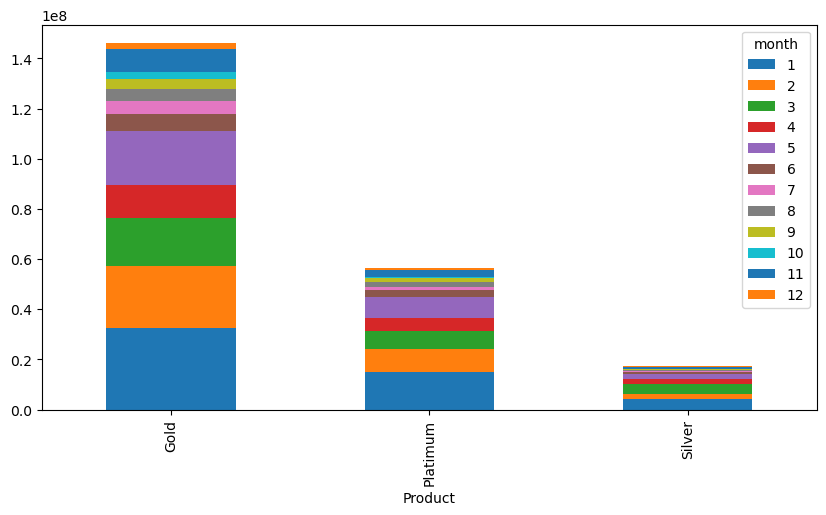

In [63]:
pd.pivot_table(cust_s, values='spend_amt', index=['Product'],  columns =['month'], aggfunc=np.sum).plot(kind='bar',figsize=(10,5),stacked=True)
plt.show()

In [ ]:
5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [65]:
cust_r['year'] = cust_r['repayment_date'].dt.year
cust_r['month'] = cust_r['repayment_date'].dt.month

In [66]:
cust_r.head()

,Customer,repayment_date,repayment_amt,Age,City,Product,Limit,Company,Segment,year,month
0,A1,2004-01-12,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,1
1,A1,2004-01-03,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,1
2,A1,2004-01-15,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,1
3,A1,2004-01-25,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,1
4,A1,2005-01-17,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005,1


In [110]:
def topten(prod,**kwargs):
    if 'month' in kwargs.keys():
        table1 = cust_r.loc[((cust_r['Product'] == prod) & (cust_r['month'] == kwargs['month']))]
        table2 = pd.pivot_table(table1,index=['City','Customer'])[['repayment_amt']].sort_values(by=['City','repayment_amt'],ascending=[True,False])
        return table2
    elif 'year' in kwargs.keys():
        table1 = cust_r.loc[((cust_r['Product'] == prod) & (cust_r['year'] == kwargs['year']))]
        table2 = pd.pivot_table(table1,index=['City','Customer'])[['repayment_amt']].sort_values(by=['City','repayment_amt'],ascending=[True,False])
        return table2
    elif 'month' in kwargs.keys() and 'year' in kwargs.keys():
        table1 = cust_r.loc[((cust_r['Product'] == prod) & (cust_r['month'] == kwargs['month']) & (cust_r['year'] == kwargs['year']))]
        table2 = pd.pivot_table(table1,index=['City','Customer'])[['repayment_amt']].sort_values(by=['City','repayment_amt'],ascending=[True,False])
        return table2        

In [122]:
topten(prod='Gold', year=2005, month=1)

C:\Users\Prateek\AppData\Local\Temp\ipykernel_10396\4137513049.py:4: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  table2 = pd.pivot_table(table1,index=['City','Customer'])[['repayment_amt']].sort_values(by=['City','repayment_amt'],ascending=[True,False])


repayment_amt
City       Customer               
BANGALORE  A13       402837.396000
           A63       372179.260000
           A1        343972.327143
           A14       248278.717500
           A43       219782.016667
           A30       202688.830000
BOMBAY     A62       332240.806667
           A42       279583.248889
           A12       203397.863333
           A17       190411.435000
CALCUTTA   A29       294980.104000
           A10       272897.385000
           A15       262875.652500
           A60       246558.481000
CHENNAI    A27       173621.561429
           A67        67845.600000
COCHIN     A65       468922.600000
           A11       319518.796667
           A16       267963.180000
           A45       254134.553750
           A61       219406.491250
           A94       153465.890000
DELHI      A93       342326.140000
           A44       301964.113750
PATNA      A66       477039.780000
           A95       369405.960000
           A26       225965.474000
TRIVANDRUM A28       172410.243333

In [1]:
table1 = cust_r.loc[((cust_r['Product'] == 'Gold') & (cust_r['month'] == 1))]
pd.pivot_table(table1,index=['City','Customer'])[['repayment_amt']].sort_values(by=['City','repayment_amt'],ascending=[True,False])

NameError: name 'cust_r' is not defined